In [58]:
import sys
print(sys.executable)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.colors = "Linux"
InteractiveShell.separate_in = 0
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import os, sys

/home/jcmint/anaconda3/envs/learningenv/bin/python


In [59]:
os.chdir(sys.path[0]) # Change dir to the folder this .ipynb file is in
print(os.listdir('../../../../data/w4pd'))
movies = pd.read_csv('../../../../data/w4pd/movies.csv')
tags = pd.read_csv('../../../../data/w4pd/tags.csv')
ratings = pd.read_csv('../../../../data/w4pd/ratings.csv')

['genome-scores.csv', 'genome-tags.csv', 'Icon\r', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


# Manipulating Data

In [60]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


# Change dir to the folder this .ipynb file is in
print(os.listdir('../../../../data/w4pd'))
movies = pd.read_csv('../../../../data/w4pd/movies.csv')
tags = pd.read_csv('../../../../data/w4pd/tags.csv')
ratings = pd.read_csv('../../../../data/w4pd/ratings.csv')
```
['genome-scores.csv', 'genome-tags.csv', 'Icon\r', 'links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']
# Manipulating Data
```python
ratings.head(5)
```
<div>
<style scoped>
.dataframe tbody tr th:only-of-type {
vertical-align: middle;
}
.dataframe tbody tr th {
vertical-align: top;
}
.dataframe thead th {
text-align: right;
}
</style>
<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>userId</th>
<th>movieId</th>
<th>rating</th>
<th>timestamp</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>2</td>
<td>3.5</td>
<td>1112486027</td>
</tr>
<tr>
<th>1</th>
<td>1</td>
<td>29</td>
<td>3.5</td>
<td>1112484676</td>
</tr>
<tr>
<th>2</th>
<td>1</td>
<td>32</td>
<td>3.5</td>
<td>1112484819</td>
</tr>
<tr>
<th>3</th>
<td>1</td>
<td>47</td>
<td>3.5</td>
<td>1112484727</td>
</tr>
<tr>
<th>4</th>
<td>1</td>
<td>50</td>
<td>3.5</td>
<td>1112484580</td>
</tr>
</tbody>
</table>
</div>
## Aggregating and Grouping
**Code:** `df[['col1', 'col2']].groupby('col1')`It makes sense to calculate different aggregate stats for different groupings. `groupby` doesn't do any aggregate calculations by default - it just reorders the df so that the same values in the grouping column are all consecutive. You can also use .count() on a grouping.

In [61]:
user_ratings = ratings[['userId', 'rating']].groupby('userId').mean()
user_ratings.head()
movie_ratings = ratings[['movieId', 'rating']].groupby('movieId').mean()
movie_ratings.head()

,rating
userId,
1,3.742857
2,4.000000
3,4.122995
4,3.571429
5,4.272727


,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


## Plotting aggregated dataGenerate a histogram of movie ratings (so group by the ratings column).

        movieId
rating         
0.5      239125
1.0      680732
1.5      279252
2.0     1430997
2.5      883398
3.0     4291193
3.5     2200156
4.0     5561926
4.5     1534824
5.0     2898660


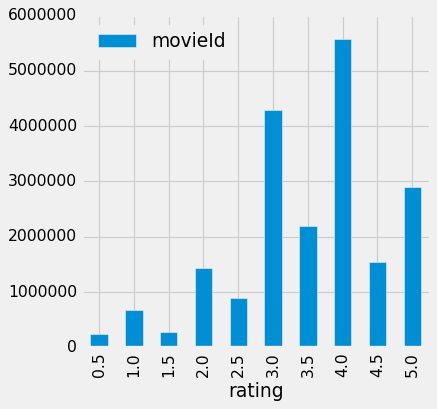

In [62]:
ratings_hist = ratings[['movieId', 'rating']].groupby('rating').count()
print(ratings_hist)
# Now we plot
import matplotlib
ratings_hist.plot(kind = "bar", figsize = (5, 5))
plt.show()

## FilteringEncode a filter that saves the indices of a dataframe (for which a condition is true), and then apply the filter as a mask to extract the desired values. (This can also apply to 3D image matrices).Below - find the most active raters (count of userId groupings of the ratings df). Looking at the mean and standard dev set the cutoff at 2000! movie ratings.

In [63]:
active_raters = ratings[['userId', 'rating']].groupby('userId').count()
print(active_raters.mean(), active_raters.std())
highly_active_raters = active_raters[active_raters['rating'] > 2000]
print(highly_active_raters.shape[0])

rating    144.41353
dtype: float64 rating    230.267257
dtype: float64
255


### Filtering based on string matchingUsing the movies dataframe, filter for movies with Animation as a genre:

In [64]:
movies.head()
is_anime = movies['genres'].str.contains('Ani*')
the_anime = movies[is_anime]
the_anime.shape[0]
the_anime.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


1027

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
47,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children


# Joining DataCombining data from multiple dataframes or sources. ## Plotting aggregated data
Generate a histogram of movie ratings (so group by the ratings column).
```python
ratings_hist = ratings[['movieId', 'rating']].groupby('rating').count()
print(ratings_hist)
# Now we plot
import matplotlib
ratings_hist.plot(kind = "bar", figsize = (5, 5))
plt.show()
```
movieId
rating
0.5      239125
1.0      680732
1.5      279252
2.0     1430997
2.5      883398
3.0     4291193
3.5     2200156
4.0     5561926
4.5     1534824
5.0     2898660
<matplotlib.axes._subplots.AxesSubplot at 0x7f642ce23f98>
![png](4_Pandas4_files/4_Pandas4_8_2.png)
## Filtering
Encode a filter that saves the indices of a dataframe (for which a condition is true), and then apply the filter as a mask to extract the desired values. (This can also apply to 3D image matrices).
Below - find the most active raters (count of userId groupings of the ratings df). Looking at the mean and standard dev set the cutoff at 2000! movie ratings.
```python
active_raters = ratings[['userId', 'rating']].groupby('userId').count()
print(active_raters.mean(), active_raters.std())
highly_active_raters = active_raters[active_raters['rating'] > 2000]
print(highly_active_raters.shape[0])
```
rating    144.41353
dtype: float64 rating    230.267257
dtype: float64
255
### Filtering based on string matching
Using the movies dataframe, filter for movies with Animation as a genre:
```python
movies.head()
is_anime = movies['genres'].str.contains('Ani*')
the_anime = movies[is_anime]
the_anime.shape[0]
the_anime.head()
```
<div>
<style scoped>
.dataframe tbody tr th:only-of-type {
vertical-align: middle;
}
.dataframe tbody tr th {
vertical-align: top;
}
.dataframe thead th {
text-align: right;
}
</style>
<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>movieId</th>
<th>title</th>
<th>genres</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>Toy Story (1995)</td>
<td>Adventure|Animation|Children|Comedy|Fantasy</td>
</tr>
<tr>
<th>1</th>
<td>2</td>
<td>Jumanji (1995)</td>
<td>Adventure|Children|Fantasy</td>
</tr>
<tr>
<th>2</th>
<td>3</td>
<td>Grumpier Old Men (1995)</td>
<td>Comedy|Romance</td>
</tr>
<tr>
<th>3</th>
<td>4</td>
<td>Waiting to Exhale (1995)</td>
<td>Comedy|Drama|Romance</td>
</tr>
<tr>
<th>4</th>
<td>5</td>
<td>Father of the Bride Part II (1995)</td>
<td>Comedy</td>
</tr>
</tbody>
</table>
</div>
1027
<div>
<style scoped>
.dataframe tbody tr th:only-of-type {
vertical-align: middle;
}
.dataframe tbody tr th {
vertical-align: top;
}
.dataframe thead th {
text-align: right;
}
</style>
<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th>movieId</th>
<th>title</th>
<th>genres</th>
</tr>
</thead>
<tbody>
<tr>
<th>0</th>
<td>1</td>
<td>Toy Story (1995)</td>
<td>Adventure|Animation|Children|Comedy|Fantasy</td>
</tr>
<tr>
<th>12</th>
<td>13</td>
<td>Balto (1995)</td>
<td>Adventure|Animation|Children</td>
</tr>
<tr>
<th>47</th>
<td>48</td>
<td>Pocahontas (1995)</td>
<td>Animation|Children|Drama|Musical|Romance</td>
</tr>
<tr>
<th>236</th>
<td>239</td>
<td>Goofy Movie, A (1995)</td>
<td>Animation|Children|Comedy|Romance</td>
</tr>
<tr>
<th>241</th>
<td>244</td>
<td>Gumby: The Movie (1995)</td>
<td>Animation|Children</td>
</tr>
</tbody>
</table>
</div>
# Joining Data
Combining data from multiple dataframes or sources.
## Stack dataframes
**Code:** `pd.concat([df1, df2])`The stacking is not really ideal in this scenario - it would be better to stack df's that have matched columns and data types.

In [65]:
stack_1 = pd.concat([tags.head(), movies.head()])
stack_1

/home/jcmint/anaconda3/envs/learningenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,genres,movieId,tag,timestamp,title,userId
0,NaN,4141,Mark Waters,1.240597e+09,NaN,18.0
1,NaN,208,dark hero,1.368150e+09,NaN,65.0
2,NaN,353,dark hero,1.368150e+09,NaN,65.0
3,NaN,521,noir thriller,1.368150e+09,NaN,65.0
4,NaN,592,dark hero,1.368150e+09,NaN,65.0
0,Adventure|Animation|Children|Comedy|Fantasy,1,NaN,NaN,Toy Story (1995),NaN
1,Adventure|Children|Fantasy,2,NaN,NaN,Jumanji (1995),NaN
2,Comedy|Romance,3,NaN,NaN,Grumpier Old Men (1995),NaN
3,Comedy|Drama|Romance,4,NaN,NaN,Waiting to Exhale (1995),NaN
4,Comedy,5,NaN,NaN,Father of the Bride Part II (1995),NaN


## Stack dataframes (append method)
**Code:** `df1.append(df2)`This gives the same results as using stack.

In [66]:
append_1 = tags.head().append(movies.head())
append_1

/home/jcmint/anaconda3/envs/learningenv/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,genres,movieId,tag,timestamp,title,userId
0,NaN,4141,Mark Waters,1.240597e+09,NaN,18.0
1,NaN,208,dark hero,1.368150e+09,NaN,65.0
2,NaN,353,dark hero,1.368150e+09,NaN,65.0
3,NaN,521,noir thriller,1.368150e+09,NaN,65.0
4,NaN,592,dark hero,1.368150e+09,NaN,65.0
0,Adventure|Animation|Children|Comedy|Fantasy,1,NaN,NaN,Toy Story (1995),NaN
1,Adventure|Children|Fantasy,2,NaN,NaN,Jumanji (1995),NaN
2,Comedy|Romance,3,NaN,NaN,Grumpier Old Men (1995),NaN
3,Comedy|Drama|Romance,4,NaN,NaN,Waiting to Exhale (1995),NaN
4,Comedy,5,NaN,NaN,Father of the Bride Part II (1995),NaN


## Inner join with pd.concat
**Code:** `pd.concat`This is NOT the same as an INNER JOIN ON tb1.field1 = tbl2.field1 as it would be in SQLAs a result, this isn't particularly useful since you're not matching as you combine data.

In [67]:
joined = pd.concat([tags.head(), movies.head()], axis = 1, join = "inner")
joined

,userId,movieId,tag,timestamp,movieId,title,genres
0,18,4141,Mark Waters,1240597180,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,65,208,dark hero,1368150078,2,Jumanji (1995),Adventure|Children|Fantasy
2,65,353,dark hero,1368150079,3,Grumpier Old Men (1995),Comedy|Romance
3,65,521,noir thriller,1368149983,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,65,592,dark hero,1368150078,5,Father of the Bride Part II (1995),Comedy


## The actual inner join
**Code:** `df1.merge(df2, on = 'col1', how='inner')`The **actual** INNER JOINBelow, inner jon the aggregated mean movie_ratings and a new movie_counts (the number of ratings per movie). Then inner join again to `movies` dataframe.

In [68]:
movie_counts = ratings[['movieId', 'rating']].groupby('movieId').count()
movie_ratings.head()
movie_counts.head()
merged_1 = movie_ratings.merge(movie_counts, on = 'movieId', how='inner')
merged_1.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


,rating_x,rating_y
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161


## Chaining together mergesChained merging on a merged dataframe without a new object is possible, but becomes unreadable after a few in a row:

In [69]:
merged_2 = merged_1.merge(movies, on = 'movieId', how='inner')
merged_3 = movie_ratings.merge(movie_counts, on = 'movieId', how='inner').merge(movies, on = 'movieId', how='inner')
merged_2.head()
merged_3.head()

,movieId,rating_x,rating_y,title,genres
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy


,movieId,rating_x,rating_y,title,genres
0,1,3.921240,49695,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.211977,22243,Jumanji (1995),Adventure|Children|Fantasy
2,3,3.151040,12735,Grumpier Old Men (1995),Comedy|Romance
3,4,2.861393,2756,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,3.064592,12161,Father of the Bride Part II (1995),Comedy


# Combining everythingAfter merging three dataframes with aggregated ratings and rating counts data, we can apply a filter - the `is_anime` which was a string filter, as well as a new filter for movies that were both highly rated (more than 4) and actively rated (more than 2000 ratings).

In [70]:
ani_summary = merged_3[is_anime & (merged_3['rating_x'] > 4) & (merged_3['rating_y'] > 2000)]
ani_summary
ani_summary.shape[0]

/home/jcmint/anaconda3/envs/learningenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,movieId,rating_x,rating_y,title,genres
708,720,4.109473,8171,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
732,745,4.167315,12073,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy
1125,1148,4.181068,15022,Wallace & Gromit: The Wrong Trousers (1993),Animation|Children|Comedy|Crime
1197,1223,4.066765,7781,"Grand Day Out with Wallace and Gromit, A (1989)",Adventure|Animation|Children|Comedy|Sci-Fi
2914,3000,4.096299,9564,Princess Mononoke (Mononoke-hime) (1997),Action|Adventure|Animation|Drama|Fantasy
3340,3429,4.120696,2585,Creature Comforts (1989),Animation|Comedy
5519,5618,4.203810,13466,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy
5591,5690,4.089744,3198,Grave of the Fireflies (Hotaru no haka) (1988),Animation|Drama|War
5872,5971,4.149481,5489,My Neighbor Totoro (Tonari no Totoro) (1988),Animation|Children|Drama|Fantasy
6251,6350,4.061917,3537,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,Action|Adventure|Animation|Children|Fantasy|Sc...


11

In conclusion, it seems that the two big categories were Wallance & Gromit and Anime, which makes sense, although it misses some Pixar and Disney films which I would've expected to make the cut.